In [1]:
!pip install pulp
import pandas as pd
import pulp
import numpy as np
import datetime
import matplotlib.pyplot as plt 

zsh:1: command not found: pip


In [2]:
df_distance = pd.read_csv("distances.csv")
df_drivers = pd.read_csv("part3_drivers.csv")
df_3 = pd.read_csv("part3_small.csv")

start_time = pd.to_datetime('2022-04-02 17:00:00')
W = 30
W_range = range(0, 50, 5)

In [3]:
df_drivers

,start region,velocity
0,Downtown Toronto (Richmond / Adelaide / King),40
1,Downtown Toronto (St. James Park),35
2,Downtown Toronto (Church and Wellesley),32


In [4]:
df_3

,restaurant,customer,estimated availability
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 5:17 PM
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 5:49 PM
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 6:17 PM
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 5:53 PM
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 5:24 PM


## Sets

In [5]:
vehicle = np.arange(0, len(df_drivers)).tolist() 
vehicle

[0, 1, 2]

In [6]:
start_region = []
for v in vehicle:
    start_region.append(df_drivers["start region"][v])
start_region

['Downtown Toronto (Richmond / Adelaide / King)',
 'Downtown Toronto (St. James Park)',
 'Downtown Toronto (Church and Wellesley)']

In [7]:
restaurant = df_3["restaurant"].unique().tolist()
restaurant

['Downtown Toronto (Central Bay Street)',
 'Downtown Toronto (Christie)',
 'Downtown Toronto (Ryerson)',
 'Downtown Toronto (St. James Park)',
 'Downtown Toronto (Kensington Market / Chinatown / Grange Park)']

In [8]:
customer = df_3["customer"].unique().tolist()
customer

['North York (Armour Heights / Wilson Heights / Downsview North)',
 'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
 'York (Fairbank / Oakwood)',
 'East Toronto (The Beaches)',
 'Downtown Toronto (Central Bay Street)']

In [9]:
loc_index = {}
locations = start_region + restaurant + customer

for i, location in enumerate(locations):
    loc_index[i] = location
loc_index

{0: 'Downtown Toronto (Richmond / Adelaide / King)',
 1: 'Downtown Toronto (St. James Park)',
 2: 'Downtown Toronto (Church and Wellesley)',
 3: 'Downtown Toronto (Central Bay Street)',
 4: 'Downtown Toronto (Christie)',
 5: 'Downtown Toronto (Ryerson)',
 6: 'Downtown Toronto (St. James Park)',
 7: 'Downtown Toronto (Kensington Market / Chinatown / Grange Park)',
 8: 'North York (Armour Heights / Wilson Heights / Downsview North)',
 9: 'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
 10: 'York (Fairbank / Oakwood)',
 11: 'East Toronto (The Beaches)',
 12: 'Downtown Toronto (Central Bay Street)'}

In [10]:
start = np.arange(0, len(loc_index)).tolist()
start

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [11]:
end = start[len(start_region):]
end

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [12]:
start_regions = start[:len(start_region)]
start_regions

[0, 1, 2]

In [13]:
restaurants = start[len(start_region):-len(customer)]
restaurants

[3, 4, 5, 6, 7]

In [14]:
customers = start[-len(customer):]
customers

[8, 9, 10, 11, 12]

In [15]:
step = np.arange(0, len(locations)).tolist()
step

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [16]:
list_order = []
for index, row in df_3.iterrows():
    list_order.append([row["restaurant"], row["customer"]])
print(list_order)

[['Downtown Toronto (Central Bay Street)', 'North York (Armour Heights / Wilson Heights / Downsview North)'], ['Downtown Toronto (Christie)', 'West Toronto (Brockton / Parkdale Village / Exhibition Place)'], ['Downtown Toronto (Ryerson)', 'York (Fairbank / Oakwood)'], ['Downtown Toronto (St. James Park)', 'East Toronto (The Beaches)'], ['Downtown Toronto (Kensington Market / Chinatown / Grange Park)', 'Downtown Toronto (Central Bay Street)']]


## Parameters

In [17]:
restaurant_index = {}
for key in restaurants:
    for value in restaurant:
        restaurant_index[key] = value
        restaurant.remove(value)
        break  

In [18]:
restaurant_index

{3: 'Downtown Toronto (Central Bay Street)',
 4: 'Downtown Toronto (Christie)',
 5: 'Downtown Toronto (Ryerson)',
 6: 'Downtown Toronto (St. James Park)',
 7: 'Downtown Toronto (Kensington Market / Chinatown / Grange Park)'}

In [19]:
customer_index = {}
for key in customers:
    for value in customer:
        customer_index[key] = value
        customer.remove(value)
        break  

In [20]:
restaurant_index

{3: 'Downtown Toronto (Central Bay Street)',
 4: 'Downtown Toronto (Christie)',
 5: 'Downtown Toronto (Ryerson)',
 6: 'Downtown Toronto (St. James Park)',
 7: 'Downtown Toronto (Kensington Market / Chinatown / Grange Park)'}

In [21]:
location_distance = {}
for i in start:
    for j in end: 
        if loc_index[i] == loc_index[j]:
            location_distance[(i,j)] = 0 
        else:
            location_distance[(i,j)] = df_distance[(df_distance["origin"] == loc_index[i]) &(df_distance["destination"] == loc_index[j])]["distance"].item()
            

In [22]:
min_arrival_time_mins = {}
for j in end:
    if j in restaurants:
        delta = pd.to_datetime(df_3.loc[df_3["restaurant"] == loc_index[j]]["estimated availability"].tolist()[0]) - start_time
        min_arrival_time_mins[j] = delta/datetime.timedelta(minutes=1)
    if j in customers: 
        min_arrival_time_mins[j] = 0 
min_arrival_time_mins
#0,1,2 are start regions

{3: 17.0, 4: 49.0, 5: 77.0, 6: 53.0, 7: 24.0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

In [23]:
drivers_start = {}
for v in vehicle:
    drivers_start[v] = df_drivers.iloc[v][0]
drivers_start

{0: 'Downtown Toronto (Richmond / Adelaide / King)',
 1: 'Downtown Toronto (St. James Park)',
 2: 'Downtown Toronto (Church and Wellesley)'}

In [24]:
drivers_velocity = {}
for v in vehicle:
    drivers_velocity[v] = 60 /df_drivers.iloc[v][1] # convert to minutes / km 
drivers_velocity  

{0: 1.5, 1: 1.7142857142857142, 2: 1.875}

In [25]:
#Calculate travel time for each distance between i and j
wait_time = 5

travel_time = {}
for i in start:
    for j in end:
        for v in vehicle:
            if i == j:
                travel_time[(i,j,v)] = 0 
            else: 
                if i in customers:
                    travel_time[(i,j,v)] = location_distance[(i,j)]*drivers_velocity[v] + wait_time
                else:
                    travel_time[(i,j,v)] = location_distance[(i,j)]*drivers_velocity[v] 

### Variables

In [26]:
xvar = pulp.LpVariable.dict("x", (start, end, vehicle, step), cat=pulp.LpBinary)
dvar = pulp.LpVariable.dict("d", (vehicle, step), lowBound=0.0, cat=pulp.LpContinuous)
wvar = pulp.LpVariable.dict("w", (end, vehicle, step), lowBound=0.0, cat=pulp.LpContinuous)
zvar = pulp.LpVariable.dict("z", (vehicle, step), lowBound=0.0, cat=pulp.LpContinuous)

### Model & Constraints

In [31]:
flowmodel = pulp.LpProblem(name = "FlowModel", sense = pulp.LpMinimize)

# Constraint: every location visited once by one vehicle
for j in end: 
    flowmodel += pulp.lpSum([xvar[(i,j,v,t)] for i in start for v in vehicle for t in step]) == 1


# Constraint: Conservation of flow: use ">=" as some drivers may end their tour earlier than step T
for v in vehicle:  
    for t in step[:-1]:
        for j in end:
            flowmodel += (pulp.lpSum([xvar[(i,j,v,t)] for i in start]) >= pulp.lpSum([xvar[(j,k,v,t+1)] for k in end]))

            
# Constraint: Each driver starts at their own region and has an outflow of 1 in the first step, others are zero
for v in vehicle:
    flowmodel += pulp.lpSum(xvar[(v,j,v,0)] for j in end) == 1
    flowmodel += pulp.lpSum(xvar[(j,j,v,0)] for j in end) == 0
    # each driver only starts from their starting region once
    flowmodel += pulp.lpSum(xvar[(v,j,v,t)] for j in end for t in step[1:]) == 0
    # each driver cannot start from other locations
    vehicle_copy = vehicle.copy()
    vehicle_copy.remove(v)
    flowmodel += pulp.lpSum(xvar[(a,j,v,t)] for a in vehicle_copy for j in end for t in step[1:]) == 0


# Constraint: for each vehicle at each time step, there should be only 1 xvar <= 1 (=0 if nothing happened within this time block)
for v in vehicle:
    for t in step:
        flowmodel += pulp.lpSum(xvar[(i,j,v,t)] for i in start for j in end) <= 1
        
    
# Constraint: make sure driver goes to a restaurant before delivering the food
def get_key_from_restaurant(val):
    for key, value in restaurant_index.items():
         if val == value:
                return key
            
def get_key_from_customer(val):
    for key, value in customer_index.items():
         if val == value:
                return key
    
def find_restaurant_of_customer(customer):
    for order in list_order:
        if customer == get_key_from_customer(order[1]):
            return get_key_from_restaurant(order[0])
        
for t in step: 
    for v in vehicle:
        for j in end: 
            if j in customers: 
                flowmodel += pulp.lpSum( [xvar[i,j,v,t] for i in start]) <= pulp.lpSum([xvar[i, find_restaurant_of_customer(j),v, t_] for i in start for t_ in step[:t]])

                
# # Constraint: Time to arrive at the location of the t-th step
for v in vehicle:
    for t in step:
        if t == 0: 
            flowmodel += dvar[v,t] >= pulp.lpSum([ xvar[(i,j,v,0)] * min_arrival_time_mins[j] for i in start for j in end])
            flowmodel += dvar[v,t] >= pulp.lpSum([ xvar[(i,j,v,t)] * travel_time[(i,j,v)] for i in start for j in end])
        else:
            flowmodel += dvar[v,t] >= (dvar[v,t-1] + pulp.lpSum([ xvar[(i,j,v,t)] * travel_time[(i,j,v)] for i in start for j in end]))      

            
# # Constraint: if arriving at location j, ensures time is at least the min_arrival_time_mins
for t in step:
    for i in start:
        for j in end:
            for v in vehicle:
                flowmodel += dvar[v,t] >= min_arrival_time_mins[j] * xvar[i,j,v,t]


# Constraint: define waiting time of each order at step t: wvar[j,t]
for v in vehicle:
    for t in step:
        for j in end:
            if j in restaurants:
                flowmodel += wvar[(j,v,t)]  == 0
            else:
                flowmodel += wvar[(j,v,t)] == dvar[v,t] - pulp.lpSum([ min_arrival_time_mins[find_restaurant_of_customer(j)] * xvar[(i,j,v,t)] for i in start])

                
# Constraint: ensures the average waiting time of the orders is lower than the maximum W
M = 100000
for t in step:
    for i in start:
        for j in end:
            for v in vehicle:
                if t == 0:
                    flowmodel += zvar[v,t] == 0 
                else: 
                    flowmodel += zvar[v,t] >= zvar[v,t-1] + wvar[(j,v,t)] - M * (1 - xvar[(i,j,v,t)])
                    flowmodel += zvar[v,t] <= zvar[v,t-1] + wvar[(j,v,t)] + M * (1 - xvar[(i,j,v,t)])

                
for v in vehicle:
    for t in step:
        flowmodel += pulp.lpSum(zvar[v,t]) <= W * len(customers)
 

### Objective Functions

In [32]:
obj = pulp.lpSum([location_distance[(i,j)] * xvar[(i,j,v,t)] for i in start for j in end for v in vehicle for t in step])
flowmodel += obj

### Solution Process

In [33]:
flowmodel.solve()
print("Status:", pulp.LpStatus[flowmodel.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/johnnyli/Library/Python/3.8/lib/python/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/wx/5wptcyfx291dr5k6zrbpc9th0000gq/T/26a91450131b47e4ad5cffd5171eb42c-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/wx/5wptcyfx291dr5k6zrbpc9th0000gq/T/26a91450131b47e4ad5cffd5171eb42c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15912 COLUMNS
At line 121390 RHS
At line 137298 BOUNDS
At line 142369 ENDATA
Problem MODEL has 15907 rows, 5538 columns and 90774 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4.3129 - 0.15 seconds
Cgl0002I 1290 variables fixed
Cgl0003I 211 fixed, 0 tightened bounds, 5426 strengthened rows, 0 substitutions
Cgl0003I 14 fixed, 0 tightened bounds, 5287 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 51

In [34]:
# Total Distance
totalDistance =pulp.value(flowmodel.objective)
print("Total Distance: " + str(totalDistance))

Total Distance: 30.544085866191324


In [35]:
# print solution  
for t in step: 
    print("Step: " + str(t))
#     print("Total travel time (in minutes) up to this step: " + str(dvar[t].varValue))
    
    for v in vehicle:
        for i in start: 
            for j in end: 

                if xvar[(i,j,v,t)].varValue > 0.0:
                    print("\tVehicle: " + str(v))
                    print("\tLeave from " + str(i) + ": " + str(loc_index.get(i)))
                    print("\tTravel to " + str(j) + ": " + str(loc_index.get(j)))

                    print("\tWaiting time: " + str(wvar[(j,v,t)].varValue))
                    print("\tTotal waiting time up to this step: " + str(zvar[v,t].varValue))


#print("Average waiting time: " + str(zvar[v,t].varValue/len(customers)))


Step: 0
	Vehicle: 0
	Leave from 0: Downtown Toronto (Richmond / Adelaide / King)
	Travel to 7: Downtown Toronto (Kensington Market / Chinatown / Grange Park)
	Waiting time: 0.0
	Total waiting time up to this step: 0.0
	Vehicle: 1
	Leave from 1: Downtown Toronto (St. James Park)
	Travel to 6: Downtown Toronto (St. James Park)
	Waiting time: 0.0
	Total waiting time up to this step: 0.0
	Vehicle: 2
	Leave from 2: Downtown Toronto (Church and Wellesley)
	Travel to 4: Downtown Toronto (Christie)
	Waiting time: 0.0
	Total waiting time up to this step: 0.0
Step: 1
	Vehicle: 0
	Leave from 7: Downtown Toronto (Kensington Market / Chinatown / Grange Park)
	Travel to 12: Downtown Toronto (Central Bay Street)
	Waiting time: 1.4747411
	Total waiting time up to this step: 1.4747411
	Vehicle: 1
	Leave from 6: Downtown Toronto (St. James Park)
	Travel to 11: East Toronto (The Beaches)
	Waiting time: 12.368678
	Total waiting time up to this step: 12.368678
	Vehicle: 2
	Leave from 4: Downtown Toronto (C

### Loop through W 

In [37]:
def get_distance(W):
    flowmodel = pulp.LpProblem(name = "FlowModel", sense = pulp.LpMinimize)

    # Constraint: every location visited once by one vehicle
    for j in end: 
        flowmodel += pulp.lpSum([xvar[(i,j,v,t)] for i in start for v in vehicle for t in step]) == 1


    # Constraint: Conservation of flow: use ">=" as some drivers may end their tour earlier than step T
    for v in vehicle:  
        for t in step[:-1]:
            for j in end:
                flowmodel += (pulp.lpSum([xvar[(i,j,v,t)] for i in start]) >= pulp.lpSum([xvar[(j,k,v,t+1)] for k in end]))


    # Constraint: Each driver starts at their own region and has an outflow of 1 in the first step, others are zero
    for v in vehicle:
        flowmodel += pulp.lpSum(xvar[(v,j,v,0)] for j in end) == 1
        flowmodel += pulp.lpSum(xvar[(j,j,v,0)] for j in end) == 0
        # each driver only starts from their starting region once
        flowmodel += pulp.lpSum(xvar[(v,j,v,t)] for j in end for t in step[1:]) == 0
        # each driver cannot start from other locations
        vehicle_copy = vehicle.copy()
        vehicle_copy.remove(v)
        flowmodel += pulp.lpSum(xvar[(a,j,v,t)] for a in vehicle_copy for j in end for t in step[1:]) == 0


    # Constraint: for each vehicle at each time step, there should be only 1 xvar <= 1 (=0 if nothing happened within this time block)
    for v in vehicle:
        for t in step:
            flowmodel += pulp.lpSum(xvar[(i,j,v,t)] for i in start for j in end) <= 1


    # Constraint: make sure driver goes to a restaurant before delivering the food
    def get_key_from_restaurant(val):
        for key, value in restaurant_index.items():
             if val == value:
                    return key

    def get_key_from_customer(val):
        for key, value in customer_index.items():
             if val == value:
                    return key

    def find_restaurant_of_customer(customer):
        for order in list_order:
            if customer == get_key_from_customer(order[1]):
                return get_key_from_restaurant(order[0])

    for t in step: 
        for v in vehicle:
            for j in end: 
                if j in customers: 
                    flowmodel += pulp.lpSum( [xvar[i,j,v,t] for i in start]) <= pulp.lpSum([xvar[i, find_restaurant_of_customer(j),v, t_] for i in start for t_ in step[:t]])


    # # Constraint: Time to arrive at the location of the t-th step
    for v in vehicle:
        for t in step:
            if t == 0: 
                flowmodel += dvar[v,t] >= pulp.lpSum([ xvar[(i,j,v,0)] * min_arrival_time_mins[j] for i in start for j in end])
                flowmodel += dvar[v,t] >= pulp.lpSum([ xvar[(i,j,v,t)] * travel_time[(i,j,v)] for i in start for j in end])
            else:
                flowmodel += dvar[v,t] >= (dvar[v,t-1] + pulp.lpSum([ xvar[(i,j,v,t)] * travel_time[(i,j,v)] for i in start for j in end]))      


    # # Constraint: if arriving at location j, ensures time is at least the min_arrival_time_mins
    for t in step:
        for i in start:
            for j in end:
                for v in vehicle:
                    flowmodel += dvar[v,t] >= min_arrival_time_mins[j] * xvar[i,j,v,t]


    # Constraint: define waiting time of each order at step t: wvar[j,t]
    for v in vehicle:
        for t in step:
            for j in end:
                if j in restaurants:
                    flowmodel += wvar[(j,v,t)]  == 0
                else:
                    flowmodel += wvar[(j,v,t)] == dvar[v,t] - pulp.lpSum([ min_arrival_time_mins[find_restaurant_of_customer(j)] * xvar[(i,j,v,t)] for i in start])


    # Constraint: ensures the average waiting time of the orders is lower than the maximum W
    M = 100000
    for t in step:
        for i in start:
            for j in end:
                for v in vehicle:
                    if t == 0:
                        flowmodel += zvar[v,t] == 0 
                    else: 
                        flowmodel += zvar[v,t] >= zvar[v,t-1] + wvar[(j,v,t)] - M * (1 - xvar[(i,j,v,t)])
                        flowmodel += zvar[v,t] <= zvar[v,t-1] + wvar[(j,v,t)] + M * (1 - xvar[(i,j,v,t)])


    for v in vehicle:
        for t in step:
            flowmodel += pulp.lpSum(zvar[v,t]) <= W * len(customers)

 

        
    obj = pulp.lpSum([location_distance[(i,j)] * xvar[(i,j,v,t)] for i in start for j in end for v in vehicle for t in step])
    flowmodel += obj 
    
    optimal = flowmodel.solve()
    #print(optimal)

    if optimal == 1:
        return pulp.value(flowmodel.objective)
    else:
        return 0 



In [38]:
distance_list = []

for W in W_range:
    distance_list.append(get_distance(W))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/johnnyli/Library/Python/3.8/lib/python/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/wx/5wptcyfx291dr5k6zrbpc9th0000gq/T/4f2e94c0401c476b881850799f66c385-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/wx/5wptcyfx291dr5k6zrbpc9th0000gq/T/4f2e94c0401c476b881850799f66c385-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15912 COLUMNS
At line 121390 RHS
At line 137298 BOUNDS
At line 142369 ENDATA
Problem MODEL has 15907 rows, 5538 columns and 90774 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4.3129 - 0.08 seconds
Cgl0002I 1290 variables fixed
Cgl0003I 229 fixed, 0 tightened bounds, 330 strengthened rows, 0 substitutions
Cgl0003I 46 fixed, 0 tightened bounds, 704 strengthened rows, 0 substitutions
Cgl0003I 37 fixed, 0 tightened bounds, 528

In [39]:
distance_list

[0,
 40.35665588144056,
 39.26226225172313,
 35.15609681830278,
 30.544085866191324,
 30.544085866191324,
 30.544085866191324,
 30.544085866191324,
 30.544085866191324,
 30.544085866191324]

Text(0.5, 1.0, 'Trade-off Curve')

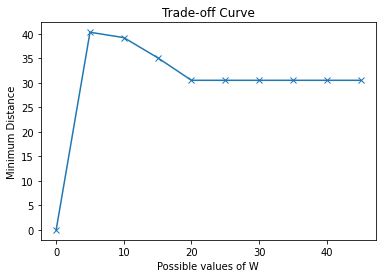

In [40]:
plt.plot(W_range, distance_list, marker='x')
plt.xlabel("Possible values of W")
plt.ylabel("Minimum Distance")
# plt.ylim(0,50)
plt.title("Trade-off Curve")